In [1]:
def fillCoord(file_path):
    coord = []
    with open(file_path, "r") as file:
        read = False
        for line in file:
            if line.strip() == "EOF":
                read = False
            if read:
                parts=line.split()
                coord.append([float(parts[1]),float(parts[2])])
            if line.strip() == "NODE_COORD_SECTION":
                read = True
    return coord

In [2]:
coord1=fillCoord("Dataset1.tsp")
coord1

[[38.24, 20.42],
 [39.57, 26.15],
 [40.56, 25.32],
 [36.26, 23.12],
 [33.48, 10.54],
 [37.56, 12.19],
 [38.42, 13.11],
 [37.52, 20.44],
 [41.23, 9.1],
 [41.17, 13.05],
 [36.08, -5.21],
 [38.47, 15.13],
 [38.15, 15.35],
 [37.51, 15.17],
 [35.49, 14.32],
 [39.36, 19.56],
 [38.09, 24.36],
 [36.09, 23.0],
 [40.44, 13.57],
 [40.33, 14.15],
 [40.37, 14.23],
 [37.57, 22.56]]

In [3]:
coord2=fillCoord("Dataset2.tsp")
coord2

[[1150.0, 1760.0],
 [630.0, 1660.0],
 [40.0, 2090.0],
 [750.0, 1100.0],
 [750.0, 2030.0],
 [1030.0, 2070.0],
 [1650.0, 650.0],
 [1490.0, 1630.0],
 [790.0, 2260.0],
 [710.0, 1310.0],
 [840.0, 550.0],
 [1170.0, 2300.0],
 [970.0, 1340.0],
 [510.0, 700.0],
 [750.0, 900.0],
 [1280.0, 1200.0],
 [230.0, 590.0],
 [460.0, 860.0],
 [1040.0, 950.0],
 [590.0, 1390.0],
 [830.0, 1770.0],
 [490.0, 500.0],
 [1840.0, 1240.0],
 [1260.0, 1500.0],
 [1280.0, 790.0],
 [490.0, 2130.0],
 [1460.0, 1420.0],
 [1260.0, 1910.0],
 [360.0, 1980.0]]

In [4]:
coord3=fillCoord("Dataset3.tsp")
coord3

[[565.0, 575.0],
 [25.0, 185.0],
 [345.0, 750.0],
 [945.0, 685.0],
 [845.0, 655.0],
 [880.0, 660.0],
 [25.0, 230.0],
 [650.0, 1130.0],
 [1605.0, 620.0],
 [1220.0, 580.0],
 [1465.0, 200.0],
 [1530.0, 5.0],
 [845.0, 680.0],
 [725.0, 370.0],
 [145.0, 665.0],
 [415.0, 635.0],
 [510.0, 875.0],
 [560.0, 365.0],
 [475.0, 960.0],
 [95.0, 260.0],
 [700.0, 500.0],
 [555.0, 815.0],
 [830.0, 485.0],
 [1170.0, 65.0],
 [830.0, 610.0]]

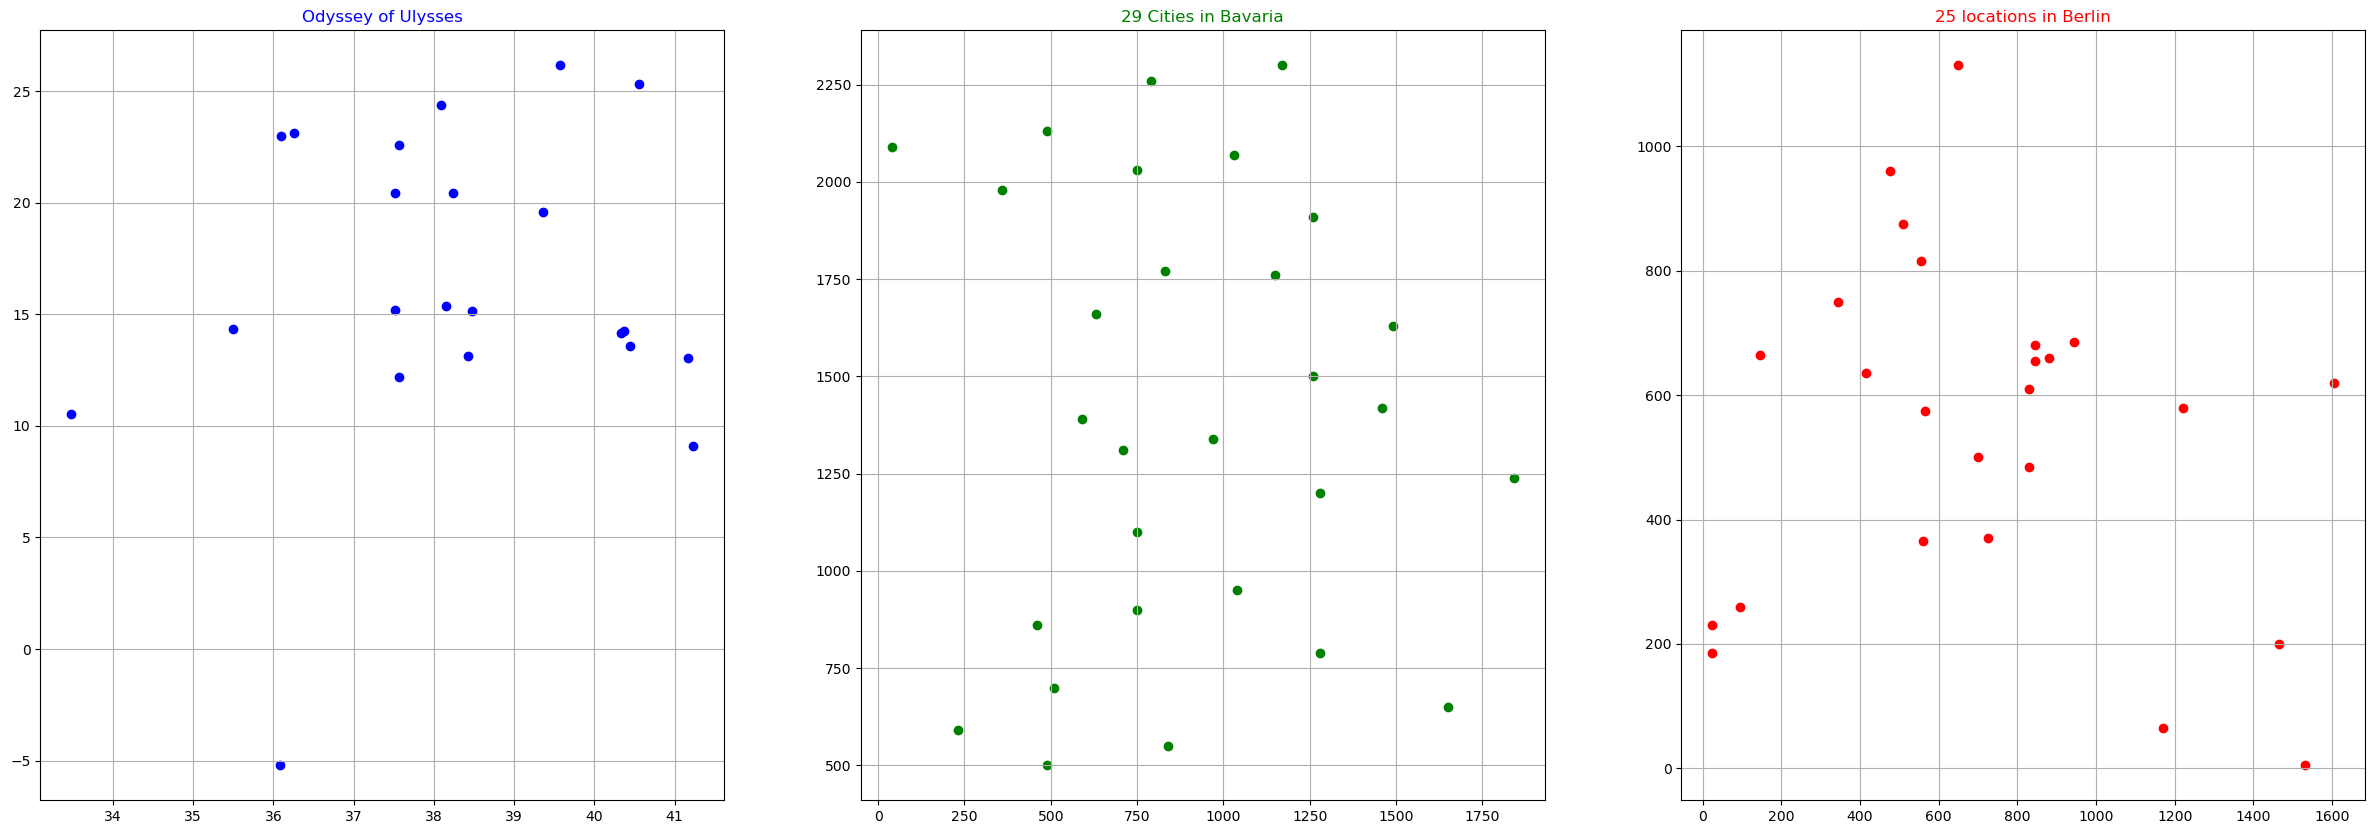

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 10))

plt.subplot(1,3,1)
x,y=zip(*coord1)
plt.title("Odyssey of Ulysses",c='blue')
plt.grid(True)
plt.scatter(x,y,c='blue')

plt.subplot(1,3,2)
x,y=zip(*coord2)
plt.title("29 Cities in Bavaria",c='green')
plt.grid(True)
plt.scatter(x,y,c='green')

plt.subplot(1,3,3)
x,y=zip(*coord3)
plt.title("25 locations in Berlin",c='red')
plt.grid(True)
plt.scatter(x,y,c='red')
plt.show()

In [6]:
import math
def distance(c1,c2):
    return math.sqrt((c1[0]-c2[0])**2+(c1[1]-c2[1])**2)

def fillDistanceMatrix(coord):
    matrix=[[0 for a in range(len(coord))] for b in range(len(coord))]
    for i,c1 in enumerate(coord):
        for j,c2 in enumerate(coord):
            matrix[i][j]=distance(c1,c2)    
    return matrix

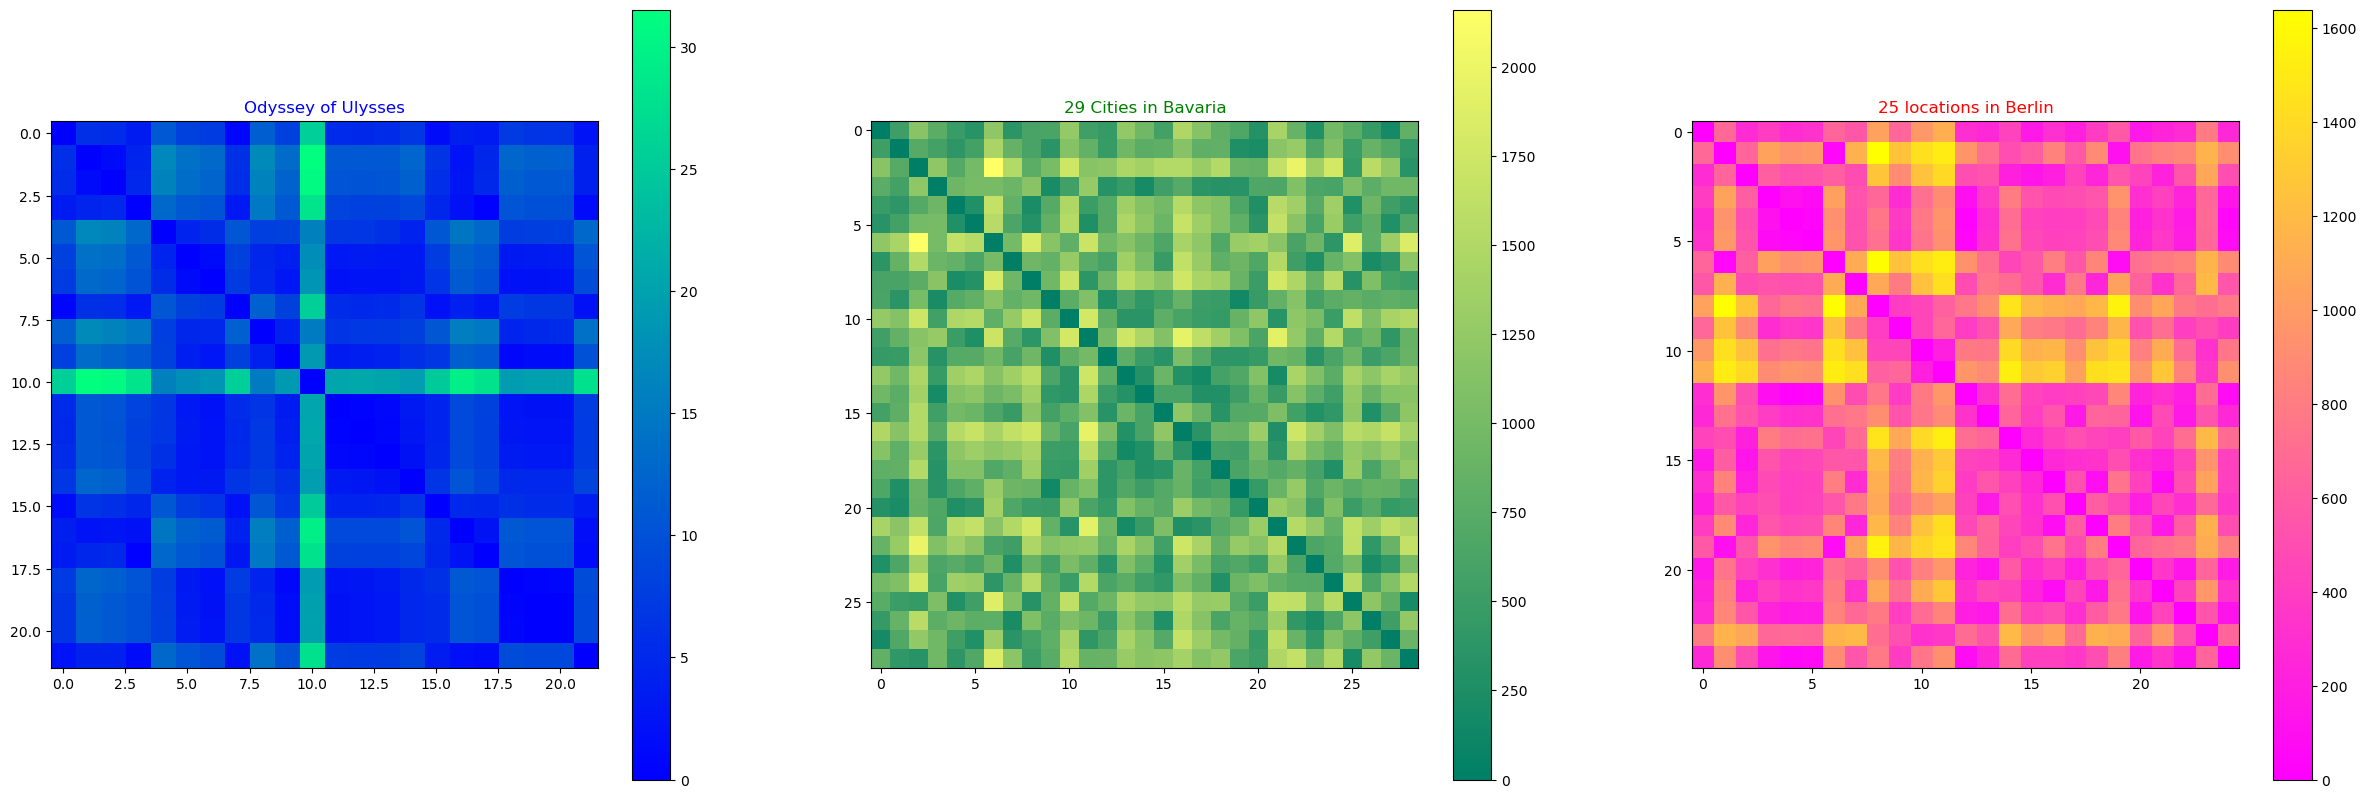

In [7]:
dm1=fillDistanceMatrix(coord1)
dm2=fillDistanceMatrix(coord2)
dm3=fillDistanceMatrix(coord3)

plt.figure(figsize=(30, 10))

plt.subplot(1,3,1)
plt.title("Odyssey of Ulysses",c='blue')
plt.imshow(dm1,cmap='winter')
plt.colorbar()

plt.subplot(1,3,2)
plt.title("29 Cities in Bavaria",c='green')
plt.imshow(dm2,cmap='summer')
plt.colorbar()

plt.subplot(1,3,3)
plt.title("25 locations in Berlin",c='red')
plt.imshow(dm3,cmap='spring')
plt.colorbar()

plt.show()


In [8]:
def distanceCalculation(orderPassage,matrix):
    d=0
    for j in range(len(orderPassage)):
       d+=matrix[orderPassage[j - 1]][orderPassage[j]]
    return d
    

In [9]:
import sys
import random

orderPassage1 = [x for x in range(len(coord1))]
orderPassage2 = [x for x in range(len(coord2))]
orderPassage3 = [x for x in range(len(coord3))]

list_orderPassage1 = [[random.sample(orderPassage1, len(orderPassage1)), sys.maxsize] for x in range(2000)]
list_orderPassage2 = [[random.sample(orderPassage2, len(orderPassage2)), sys.maxsize] for x in range(2000)]
list_orderPassage3 = [[random.sample(orderPassage3, len(orderPassage3)), sys.maxsize] for x in range(2000)]


In [10]:
def findDouble(liste):
    double = []
    for e in liste:
        if liste.count(e) > 1 and e not in double:
            double.append(e)
    return double

In [11]:
def geneticAlgo(list_orderPassage, matrix):
    list_orderPassage = [(orderPassage[0], distanceCalculation(orderPassage[0], matrix)) for orderPassage in list_orderPassage]
    list_orderPassage = sorted(list_orderPassage, key=lambda x: x[1])

    mid=len(list_orderPassage[0][0])//2
    best_orderPassage1 = [list_orderPassage[lo][0][:mid] for lo in range(500)]
    best_orderPassage2 = [list_orderPassage[lo][0][mid:] for lo in range(500)]
    
    bestone=list_orderPassage[0]   
    list_orderPassage.clear()
    list_orderPassage.append(bestone)
    
    for k in range(800):
        r1=random.randint(0,499)
        r2=random.randint(0,499)
        list_orderPassage.append([best_orderPassage1[r1] + best_orderPassage2[r2], sys.maxsize])
        list_orderPassage.append([best_orderPassage2[r1] + best_orderPassage1[r2], sys.maxsize])   
        
    for k in range(100):
        for repeat in range(1,5):
            r3=random.randint(0,len(list_orderPassage[k][0])-1)
            r4=random.randint(0,len(list_orderPassage[k][0])-1)
            temp=[list_orderPassage[k][0][l] for l in range(len(list_orderPassage[k][0]))]
            temp[r3],temp[r4]= list_orderPassage[k][0][r4], list_orderPassage[k][0][r3]
            list_orderPassage.append([temp, sys.maxsize])
   
    
    for u in range(len(list_orderPassage)):
        double=findDouble(list_orderPassage[u][0])
        missing = [unique for unique in  range(len(list_orderPassage[u][0])) if unique not in list_orderPassage[u][0]]
        random.shuffle(missing)
        for z in range(len(list_orderPassage[u][0])):
            if list_orderPassage[u][0][z] in double:
                double.remove(list_orderPassage[u][0][z])
                r=random.randint(0,len(missing)-1)
                list_orderPassage[u][0][z]=missing[r]
                missing.pop(r)
    
    return list_orderPassage

In [12]:
def check_intersection(point1, point2, point3, point4):
    a1 = point2[1] - point1[1]
    b1 = point1[0] - point2[0]

    a2 = point4[1] - point3[1]
    b2 = point3[0] - point4[0]
    denominator = a1 * b2 - a2 * b1
    if denominator == 0:
        return False
    else:
        return True


In [13]:
def verifCross(list_orderPassage, matrix,coord):
    for k in range(200):
        for l in range(len(list_orderPassage[k][0])):
            for m in range(l,len(list_orderPassage[k][0])):
                if check_intersection(coord[list_orderPassage[k][0][l - 1]], coord[list_orderPassage[k][0][m - 1]], coord[list_orderPassage[k][0][l]],coord[ list_orderPassage[k][0][m]]):
                    temp=list_orderPassage[k][0].copy()
                    temp[l:m-1] = temp[l:m-1][::-1]
                    if distanceCalculation(list_orderPassage[k][0],matrix)>distanceCalculation(temp,matrix):
                        list_orderPassage.pop()
                        list_orderPassage.append([temp,distanceCalculation(temp,matrix)])
    list_orderPassage = [(orderPassage[0], distanceCalculation(orderPassage[0], matrix)) for orderPassage in list_orderPassage]
    list_orderPassage = sorted(list_orderPassage, key=lambda x: x[1])
    return list_orderPassage


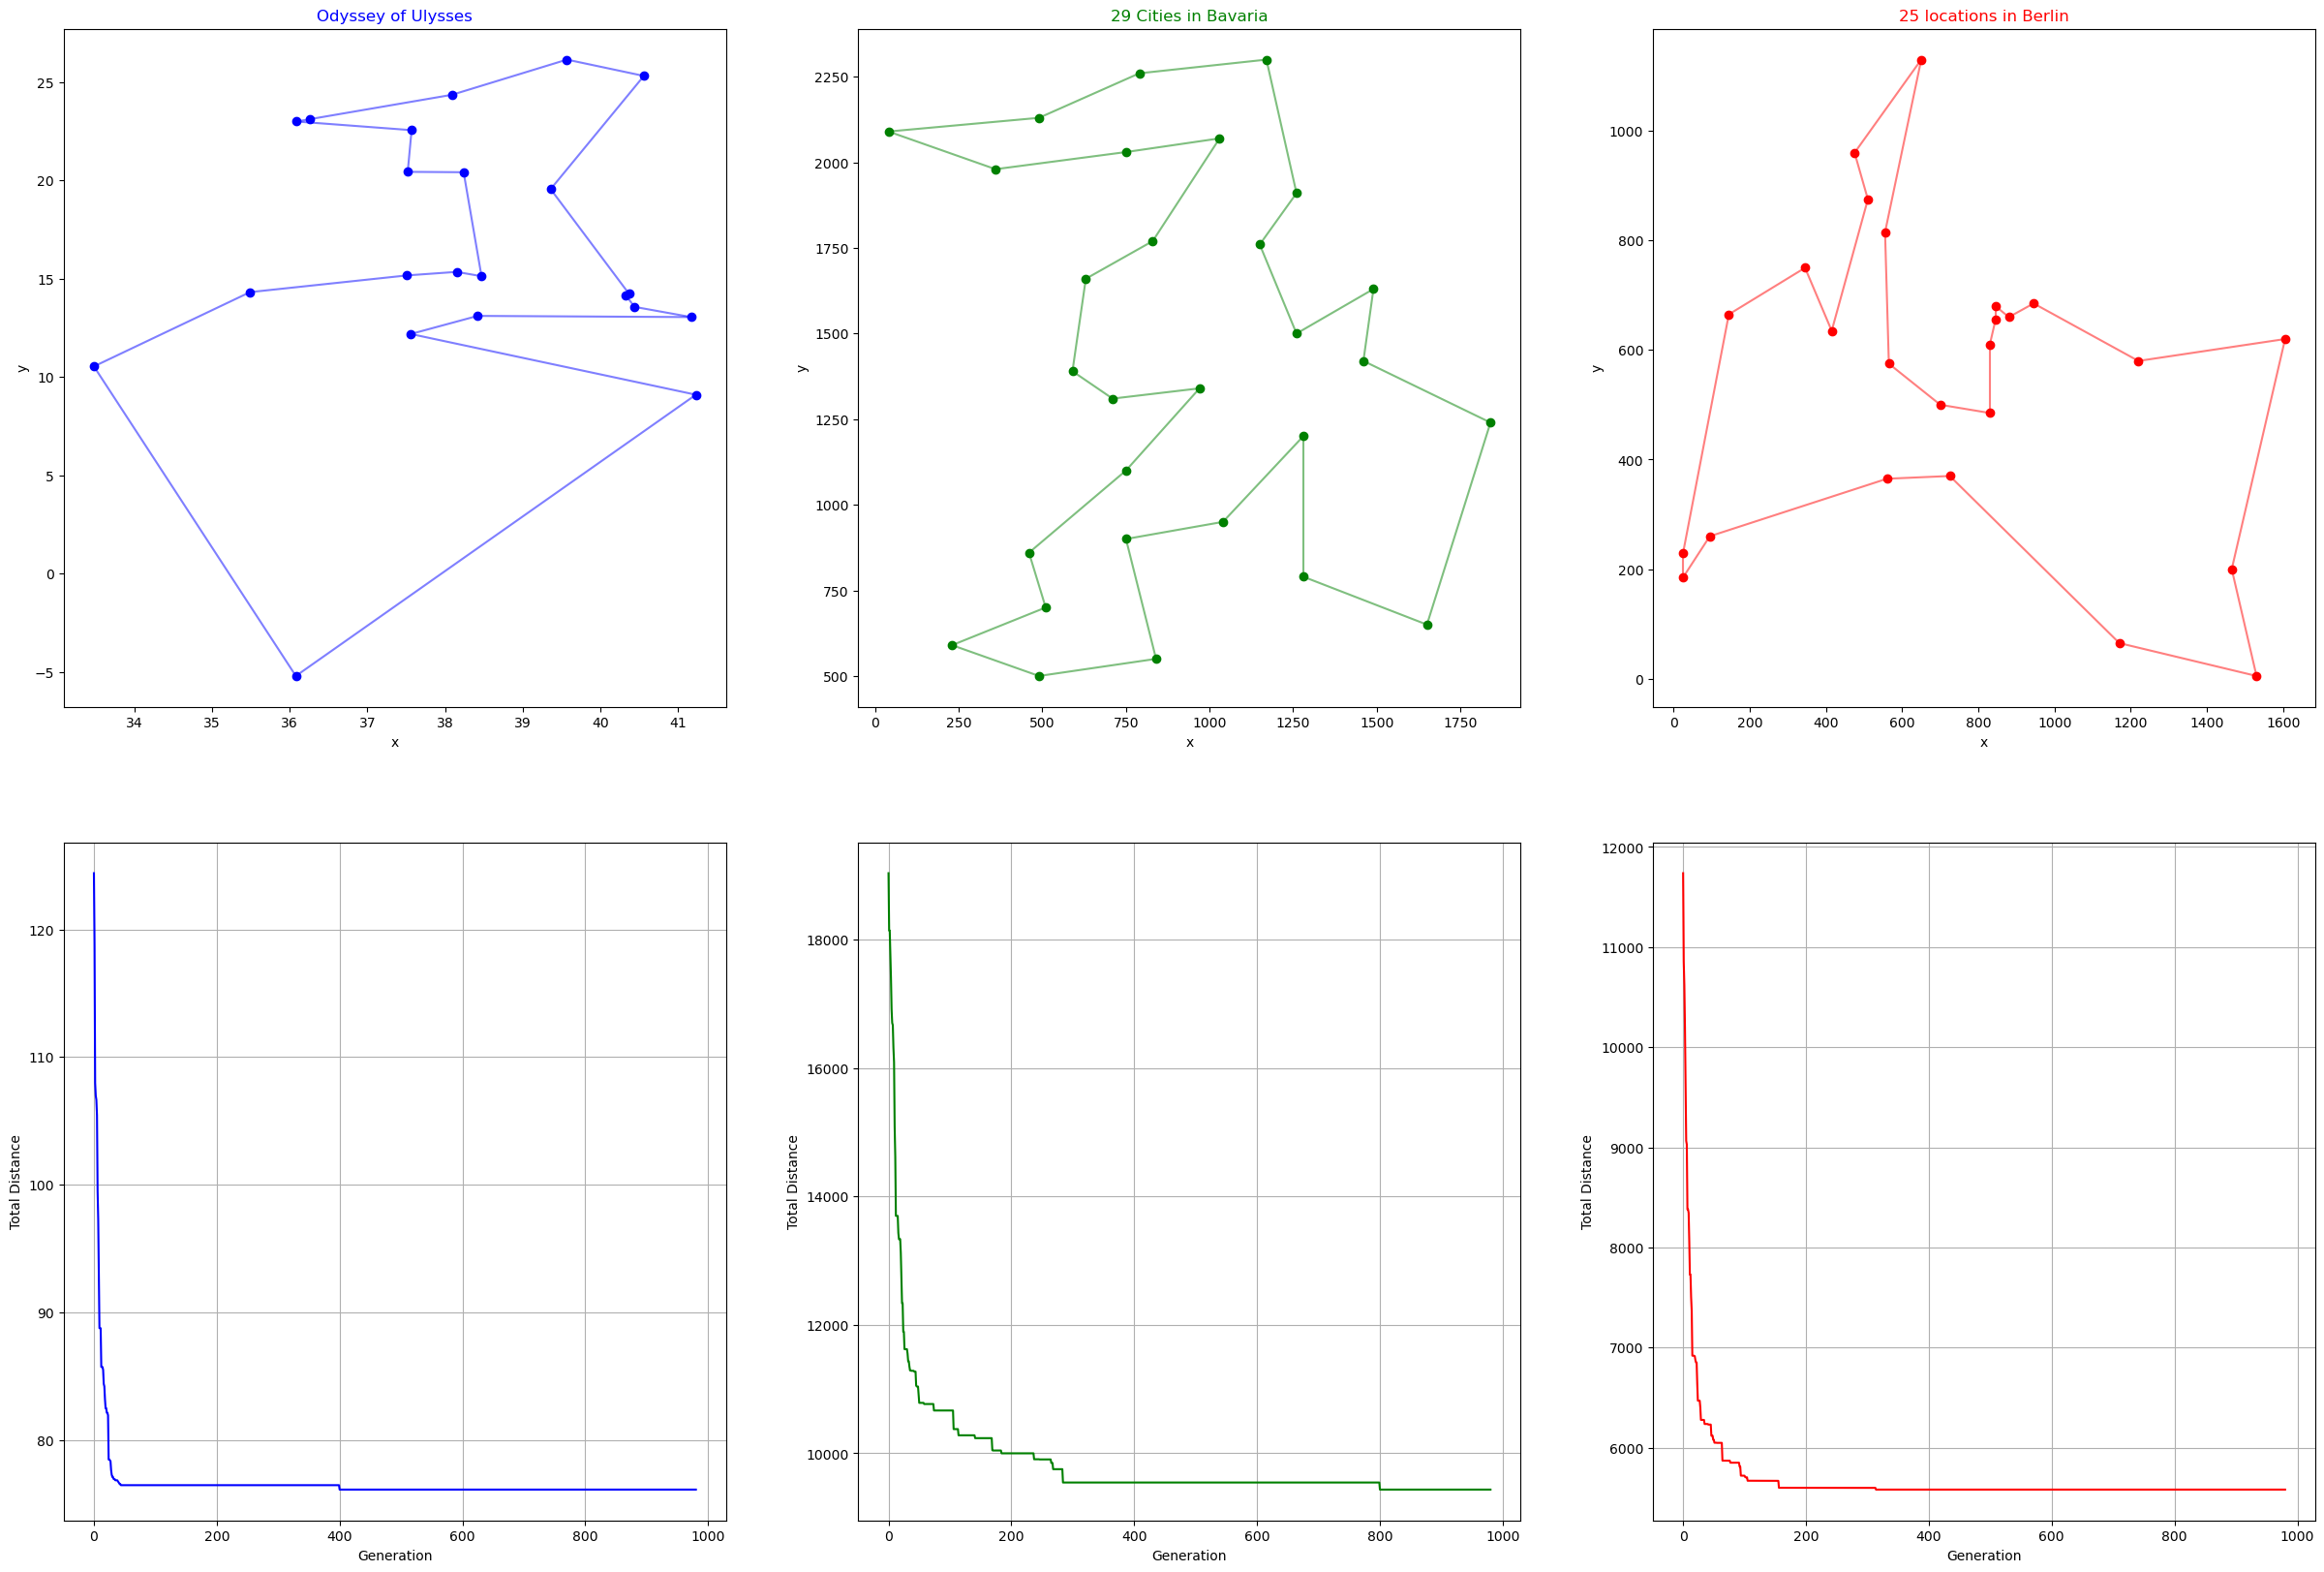

In [14]:
from IPython.display import clear_output
scores1 = []
scores2 = []
scores3 = []
for i in range(1000):
    list_orderPassage1 = geneticAlgo(list_orderPassage1, dm1)
    list_orderPassage2 = geneticAlgo(list_orderPassage2, dm2)
    list_orderPassage3 = geneticAlgo(list_orderPassage3, dm3)

    if i>1 and i%200==0:
        list_orderPassage1 = verifCross(list_orderPassage1, dm1,coord1)
        list_orderPassage2 = verifCross(list_orderPassage2, dm2,coord2)
        list_orderPassage3 = verifCross(list_orderPassage3, dm3,coord3)


    scores1.append(list_orderPassage1[0][1])
    scores2.append(list_orderPassage2[0][1])
    scores3.append(list_orderPassage3[0][1])
    
    if i>1 and ((i<80 and i%5==0) or i%20==0) :

        plt.figure(figsize=(30,20))
        
        plt.subplot(2,3,1)
        x,y=zip(*coord1)
        plt.title("Odyssey of Ulysses",c='blue')
        plt.scatter(x,y,c='blue')
        li=list_orderPassage1[0][0]
        for order in range(len(li)):
            plt.plot((x[li[order-1]], x[li[order]]),(y[li[order-1]], y[li[order]]),linestyle='-', color='blue',alpha=0.5)
        plt.xlabel("x")
        plt.ylabel("y")
        
        plt.subplot(2,3,2)
        x,y=zip(*coord2)
        plt.title("29 Cities in Bavaria",c='green')
        plt.scatter(x,y,c='green')
        li=list_orderPassage2[0][0]
        for order in range(len(li)):
            plt.plot((x[li[order-1]], x[li[order]]),(y[li[order-1]], y[li[order]]),linestyle='-',color='green',alpha=0.5)
        plt.xlabel("x")
        plt.ylabel("y")
        
        plt.subplot(2,3,3)
        x,y=zip(*coord3)
        plt.title("25 locations in Berlin",c='red')
        plt.scatter(x,y,c='red')
        li=list_orderPassage3[0][0]
        for order in range(len(li)):
            plt.plot((x[li[order-1]], x[li[order]]),(y[li[order-1]], y[li[order]]),linestyle='-', color='red',alpha=0.5)
        plt.xlabel("x")
        plt.ylabel("y")
        
        plt.subplot(2,3,4)
        plt.grid(True)
        plt.plot(scores1, color='blue')
        plt.xlabel("Generation")
        plt.ylabel("Total Distance")
        
        plt.subplot(2,3,5)
        plt.grid(True)
        plt.plot(scores2, color='green')
        plt.xlabel("Generation")
        plt.ylabel("Total Distance")
        
        plt.subplot(2,3,6)
        plt.grid(True)
        plt.plot(scores3, color='red')
        plt.xlabel("Generation")
        plt.ylabel("Total Distance")
        
        plt.show()
        clear_output(wait=True)
 


In [15]:
print(f"Best order for the Odyssey of Ulysses: {list_orderPassage1[0][0]} with a distance of {list_orderPassage1[0][1]}")
print(f"Best order for the 29 cities in Bavaria: {list_orderPassage2[0][0]} with a distance of {list_orderPassage2[0][1]}")
print(f"Best order for the 25 locations in Berlin: {list_orderPassage3[0][0]} with a distance of {list_orderPassage3[0][1]}")

Best order for the Odyssey of Ulysses: [19, 20, 15, 2, 1, 16, 3, 17, 21, 7, 0, 11, 12, 13, 14, 4, 10, 8, 5, 6, 9, 18] with a distance of 76.1027735351172
Best order for the 29 cities in Bavaria: [3, 12, 9, 19, 1, 20, 5, 4, 28, 2, 25, 8, 11, 27, 0, 23, 7, 26, 22, 6, 24, 15, 18, 14, 10, 21, 16, 13, 17] with a distance of 9435.141850488626
Best order for the 25 locations in Berlin: [22, 20, 0, 21, 7, 18, 16, 15, 2, 14, 6, 1, 19, 17, 13, 23, 11, 10, 8, 9, 3, 5, 12, 4, 24] with a distance of 5582.6502055304145
